# Gradient Descent for a simple linear regression model

The notebook aims to study and implement gradient descet method to fit the coefficients of a simple linear regression model. A synthetic dataset will be used to construct and explain the concepts.


## Acknowledgments

- Used dataset: synthetic



## Importing libraries

In [2]:
# Import the packages that we will be using
import numpy as np                  # For array
import matplotlib.pyplot as plt     # For showing plots
#import pandas as pd                 # For data handling
#import seaborn as sns               # For advanced plotting


## Create data

In [3]:
# Data for the independent variable: height
x       = np.arange(0,10,0.5)

# Generate data for the dependent variable: y = f(x)
b0real  = 70
b1real  = 30
y       = b0real + b1real * x + np.random.normal(0, 20, len(x))

# Reshape
x       = x.reshape(-1, 1)
y       = y.reshape(-1, 1)


## Undertanding the dataset

Get a general 'feel' of the dataset

In [4]:
# Calculate number of observations
No = x.shape[0]

print("Number of observations = {0:0d}".format(No))


Number of observations = 20


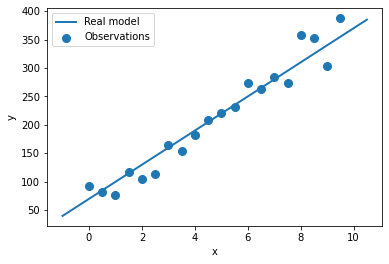

In [5]:
# Calculate data for the linear model
xl    = np.linspace(np.min(x)-1, np.max(x)+1, 100)
yreal =  b0real + b1real*xl

# Scatter plot of the data
plt.scatter(x, y, s=64, label='Observations' )
plt.plot(xl, yreal,     label='Real model',  linewidth=2)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


The scatter plot shows a linear positive relationship between $x$ and $y$: note that we draw the real lienar model which is a straight line with positive slope. Note how the observed data is around the real linear model.


## Description of the linear model

We have the data $(x_1,y_1),(x_2,y_2),...,(x_n,y_n)$ and we want to construct a linear model to explain and predict $y$ based on $x$, that is:

$$y = \beta_0 + \beta_1 \cdot x$$

This is general form of a simple linear model, where $y$ is the dependent variable, $x$ is the independet variable and 
$\beta_0$ (intercept) and $\beta_1$ (slope) are the unknown model parameters (or coefficients) that will be estimated from the data.

- $y$: response 
- $x$: predictor/variable/feature
- $\beta_1$: coefficient (slope)
- $\beta_0$: intercept


The question is then: Which straight line (i.e., $\beta_0$ and $\beta_1$) should we choose based on the data? We choose the straight line (i.e., $\beta_0$ and $\beta_1$) where total sum of error is minimum.

Our task is to obtain **coefficient estimates** ($\hat{\beta_0} $ and $\hat{\beta_1}$) such that the linear model fits the available data well, that is, so that $y_i \approx \hat{\beta_0} + \hat{\beta_1} x_i $ for $i=1,2,...,n$

Previously, we learn that the model parameters can be computed from data using the **least squares** criterion which minimize the residual sum of squares **RSS**.

Here we will use a different appoach, the **Gradient Descent** method which is an optimization technique highly important for training neural network models.


## Fitting the linear regression model using sklearn

Fitting the linear reggresion model using sklearn

In [13]:
# Import sklearn linear_model
from sklearn import linear_model

# Create linear regression object
model1 = linear_model.LinearRegression()

# Train the model
model1.fit(x, y)

# Get coefficients
b0pred = model1.intercept_[0]
b1pred = model1.coef_[0][0]

# Print estimated coefficients
print('Estimated coefficients using sklearn:')
print('beta0 = {0:0.2f}'.format(b0pred))
print('beta1 = {0:0.2f}'.format(b1pred))


Estimated coefficients using sklearn:
beta0 = 58.67
beta1 = 32.35


In [10]:
# Recall the real coefficients
print('beta0 = {0:0.2f}'.format(b0real))
print('beta1 = {0:0.2f}'.format(b1real))


beta0 = 70.00
beta1 = 30.00


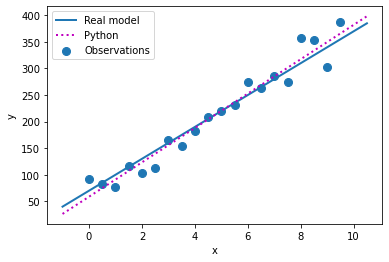

In [12]:
# Calculate data for the linear model using sklearn
ypred =  b0pred + b1pred*xl

# Scatter plot of the data
plt.scatter(x, y, s=64, label='Observations' )
plt.plot(xl, yreal,     label='Real model',  linewidth=2)
plt.plot(xl, ypred,':m',label='Python',      linewidth=2)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



## Gradient Descent


In many ML problems we have:
- Training dataset: $ \mathcal{D} = \{ (\mathbf{x}_i,y_i) \}_{i=1}^{N} $
- Hypothesis function: $ y = f(\mathbf{\beta}, \mathbf{x}) $
- Model parameters or weights: $\beta = [\beta_0, \beta_1, ..., \beta_p]^{T}$

and the goal is to learn the model parameters or weights $\mathbf{\beta}$ from the training dataset $\mathcal{D}$ so that we can predict $y$ based on new observatios $\mathbf{x}$

The **Gradient Descent** is an optimization algorithm used extensively in ML to learn the model parameters or or weights $\mathbf{\beta}$ from the training dataset $\mathcal{D}$. 

The method iteratively adapts (or updates) the parameters or weights of the model in order to minimize a cost function:

$$ \beta \Leftarrow \beta - \alpha \cdot \nabla_\beta J(\beta) $$

where:

- $\beta$ is the vector of model parameters or weights, $\beta = [\beta_0, \beta_1, ..., \beta_p]^{T}$
- $\alpha$ is the larning rate
- $\nabla_\beta (\cdot)$ is the partial derivative with respect to $\beta$
- $J(\beta)$ is the cost or loss function
- $\nabla_\beta J(\beta)$ is the partial derivative of the cost or loss function $J(\beta)$ with respect to $\beta$



The gradient descent **algorithm** is:

- Input:
    - Training data: $ \mathcal{D} = \{ (\mathbf{x}_i,y_i) \}_{i=1}^{N} $
    - Initial model parameters or weights $\beta^{(0)}$
    - Number of iterations (epochs) $N_{ite}$
    - Learning rate $\eta$


- For each iteration (epoch) repeat:
    - $ \beta^{(i+1)} := \beta^{(i)} – \alpha \cdot \nabla_\beta J(\beta^{(i)}) $


- Output:
    - Final model parameters or weights $\beta^{(N_{ite})}$
    - Loss function


Note that to be able to run the gradient descent we need:
- The hypothesis function $ f(\mathbf{\beta}, \mathbf{x}) $
- The cost or loss function $J(\beta)$
- The partial derivative of the cost or loss function $J(\beta)$ with respect to each parameter $\beta$, that is $\frac{\partial J(\beta)}{\partial \beta_i}$, for all $i=0,1,...,p$


## Gradient descent for the simple linear regression model

The linear model (hypothesis function) is:

$$y = f(\mathbf{\beta}, \mathbf{x}) = \beta_0 + \beta_1 \cdot x_1$$

Note that the vector of model parameters or weights is

$$ \beta = [\beta_0, \beta_1]^{T} $$

We have the training dataset $ \mathcal{D} = \{ (\mathbf{x}_i,y_i) \}_{i=1}^{N} $ and we our goal is to learn the model parameters of weights $ \beta $.

We choose as cost/loss function the residual sum of squares (**RSS**):

$$ J(\beta_0, \beta_1) = \sum_{i=1}^{N} \left( y_i - f(\mathbf{\beta}, \mathbf{x}) \right)^{2} $$

$$ J(\beta_0, \beta_1) = \sum_{i=1}^{N} \left( y_i - \beta_0 - \beta_1 x_{1,i} \right)^{2} $$

Note that we can use other cost or loss functions as the mean squared error (**MSE**).



Before implementing the gradient descent, we need the partial derivative of the cost or loss function $J(\beta)$ with respect to each parameter or weight, that is $\frac{\partial J(\beta)}{\partial \beta_i}$, for all $i=0,1,...,p$

For the case of the simple linear regression model we need to partial derivatives, $\frac{\partial J(\beta)}{\partial \beta_0}$ and $\frac{\partial J(\beta)}{\partial \beta_1}$

The partial derivative of $J(\beta_0, \beta_1)$ with respect to $\beta_0$ is

$$  \frac{ \partial J(\beta_0, \beta_1) }{\partial \beta_0} = -2 \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1) $$

While the partial derivative of $J(\beta_0, \beta_1)$ with respect to $\beta_1$ is

$$  \frac{ \partial J(\beta_0, \beta_1) }{\partial \beta_1} = -2 \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 x_{1,i}) $$




Therefore, the update equation for the parameters $\beta_0$ is:
$$ \beta_0^{(i+1)} := \beta_0^{(i)} - \eta \cdot \frac{ \partial J(\beta_0, \beta_1) }{\partial \beta_0} $$
$$ \beta_0^{(i+1)} := \beta_0^{(i)} - \eta \cdot \left(-2 \sum_{i=1}^{N} (y_i - \beta_0^{(i)} - \beta_1^{(i)}) \right) $$

While the update equation for the parameters $\beta_1$ is:
$$ \beta_1^{(i+1)} := \beta_1^{(i)} - \eta \cdot \left(-2 \sum_{i=1}^{N} (y_i - \beta_0^{(i)} - \beta_1^{(i)} x_{1,i}) \right) $$

- $\mathbf{x} = [x_1, x_2, ..., x_p]^{T}$
- $\beta = [\beta_0, \beta_1, ..., \beta_p]^{T}$

## Fitting the linear regression model using gradient descent

Fitting the linear reggresion model using gradient descent


In [ ]:
# Custom made funtion for the Gradient Descent for the simple linear model



In [ ]:
# Set learning rate


# Set number of epochs


# Estimate model parameters using gradient descent


# Print estimated coefficients



In [ ]:
# Recall the real coefficients



In [ ]:
# Calculate data for the linear model using descent gradient


# Scatter plot of the data



Plot loss vs epoch

In [ ]:
# Plot loss vs epoch



# Final remarks


- The **Gradient Descent** is an optimization algorithm used extensively in ML to learn the model parameters or weights from the training dataset 

- The method iteratively adapts (or updates) the parameters or weights of the model in order to minimize a cost function

- The hypothesis function

- The cost or loss function should be a smooth and continuous function

- The partial derivative of the cost function remain in terms of summations

- For a large number of observations the evaluation of the gradient will be inefficient


Limitations and solutions:

- The cost function $J(\beta)$ should be a smooth and continuous function

- For a classification problem, such as the Perceptron model:
    - The hypotheis function $f(\beta)$) is a step/sing function
    - The cost function $J(\beta)$ is defined as the squared error     
    - The problem is that $\frac{\partial J(\beta)}{\partial \beta}$ takes zero values at regions where there is not a minimum ¡¡
    - Therefore, such cost function cannot be used in the gradient descent scheme
    - There is a solution which yields to  the learning rule $ \mathbf{w} \Leftarrow  \mathbf{w} + \alpha \left( c_i - \hat{c}_i \right) \mathbf{x}_i $ for all $i=1,2,...,N$

- Stochastic gradiente descent (SGD)

- Epoch

- Batch

- Mini-batch


# Activity

1. Implement the gradient descent method for $p$ parameters (vector operations)
